In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')#connecting the notebook to your drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Classify emotions in texts based on [NRC catalog](https://www.saifmohammad.com/WebPages/AccessResource.htm), which is a manually created lexicon:

NRC Word-Emotion Association Lexicon aka NRC Emotion Lexicon aka EmoLex: 
Association of words with eight emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive) manually annotated on Amazon's Mechanical Turk. 

Available in 40 different languages.

Version: 0.92

Number of terms: 14,182 unigrams (words), ~25,000 word senses

Association scores: binary (associated or not)

Creators: Saif M. Mohammad and Peter D. Turney



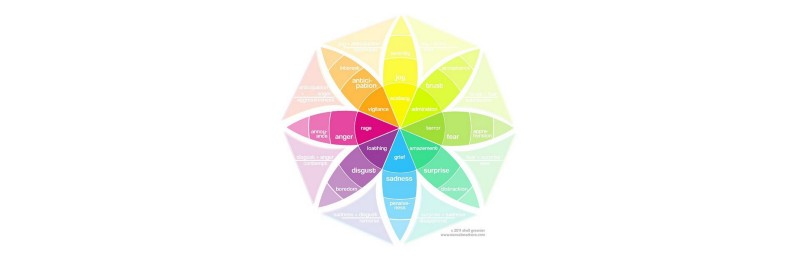

In [ ]:
!pip install LeXmo

In [ ]:
import pprint

In [ ]:
from LeXmo import LeXmo

In [ ]:
t="These Media Posts will serve as notification to the United States Congress that should Iran strike any U.S. person or target, the United States will quickly & fully strike back, & perhaps in a disproportionate manner. Such legal notice is not required, but is given nevertheless!"

In [ ]:
emo=LeXmo.LeXmo(t)

In [ ]:
print(emo)

{'text': 'These Media Posts will serve as notification to the United States Congress that should Iran strike any U.S. person or target, the United States will quickly & fully strike back, & perhaps in a disproportionate manner. Such legal notice is not required, but is given nevertheless!', 'anger': 0.0392156862745098, 'anticipation': 0.0, 'disgust': 0.0196078431372549, 'fear': 0.0, 'joy': 0.0, 'negative': 0.0392156862745098, 'positive': 0.0196078431372549, 'sadness': 0.0, 'surprise': 0.0, 'trust': 0.0392156862745098}


In [ ]:
emo.pop('text', None)

'These Media Posts will serve as notification to the United States Congress that should Iran strike any U.S. person or target, the United States will quickly & fully strike back, & perhaps in a disproportionate manner. Such legal notice is not required, but is given nevertheless!'

In [ ]:
pprint.pprint(emo)

{'anger': 0.0392156862745098,
 'anticipation': 0.0,
 'disgust': 0.0196078431372549,
 'fear': 0.0,
 'joy': 0.0,
 'negative': 0.0392156862745098,
 'positive': 0.0196078431372549,
 'sadness': 0.0,
 'surprise': 0.0,
 'trust': 0.0392156862745098}


In [ ]:
import pandas as pd

In [ ]:
tweets=pd.read_csv('gdrive/My Drive/Colab Notebooks/tweets.csv')

In [ ]:
tweets.columns


Index(['tweet_id', 'tweet_created_at', 'source', 'original_text',
       'tweet_favorite_count', 'retweet_count', 'hashtags', 'user_mentions',
       'user_mentions_id', 'topic', 'keyword', 'emojis', 'possibly_sensitive',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'user_id', 'user_followers_count',
       'user_listed_count', 'user_favourites_count', 'user_statuses_count',
       'user_created_at', 'user_screen_name', 'place', 'latitude_corr',
       'longitude_corr', 'place_coord_boundaries', 'retweet_tweet_id',
       'retweet_user_id', 'retweet_user_screen_name',
       'retweet_in_reply_to_screen_name', 'retweet_in_reply_to_status_id',
       'retweet_in_reply_to_user_id', 'rating', 'Emotions'],
      dtype='object')

In [ ]:
tweets.head()

,tweet_id,tweet_created_at,source,original_text,tweet_favorite_count,retweet_count,hashtags,user_mentions,user_mentions_id,topic,keyword,emojis,possibly_sensitive,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,user_id,user_followers_count,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,user_screen_name,place,latitude_corr,longitude_corr,place_coord_boundaries,retweet_tweet_id,retweet_user_id,retweet_user_screen_name,retweet_in_reply_to_screen_name,retweet_in_reply_to_status_id,retweet_in_reply_to_user_id,rating,Emotions
tweet_created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-18 09:41:57+00:00,1295657174694277120,Tue Aug 18 09:41:57 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...","In your own words (ie. not Wikipedia), what is...",0,3,NaN,VieArem,[43703067],Technology,wikipedia,{},NaN,NaN,NaN,NaN,281049708,384,2,2123,30000,Tue Apr 12 14:38:20 +0000 2011,LoagoNOW,Africa,11.502434,17.757812,NaN,1.295644e+18,4.370307e+07,VieArem,1.295644e+18,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",{'text': 'In your own words (ie. not Wikipedia...
2020-08-18 09:41:59+00:00,1295657183825350656,Tue Aug 18 09:41:59 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",@LakesStiles @bedform @walkhikeaholic @Wikiped...,0,0,NaN,"LakesStiles, bedform, walkhikeaholic, Wikipedi...","[979332267431677952, 267450541, 229778675, 863...",Technology,wikipedia,{'😂': 'face with tears of joy'},NaN,1.295657e+18,9.793323e+17,LakesStiles,143767748,2862,66,103160,73159,Fri May 14 10:13:29 +0000 2010,resophonick,"Cheshire,UK",53.214103,-2.471770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",{'text': '@LakesStiles @bedform @walkhikeaholi...
2020-08-18 09:42:09+00:00,1295657224963084288,Tue Aug 18 09:42:09 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Send them to St. Kilda. Their “asylum” clams c...,0,0,NaN,NaN,[],Technology,wikipedia,{},False,NaN,NaN,NaN,1081945529112821762,4150,54,6027,31604,Sun Jan 06 16:08:10 +0000 2019,KeillerDon,"Cambridge, England",52.203482,0.123582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",{'text': 'Send them to St. Kilda. Their “asylu...
2020-08-18 09:42:18+00:00,1295657264997703680,Tue Aug 18 09:42:18 +0000 2020,"<a href=""http://www.enigmabrot.de"" rel=""nofoll...","Shri Krishna, also known as Krishna, is a 1980...",0,0,NaN,NaN,[],Technology,wikipedia,{},NaN,NaN,NaN,NaN,3169494832,188,32,0,43002,Wed Apr 15 09:37:22 +0000 2015,OMG_wikipedia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'text': 'Shri Krishna, also known as Krishna,..."
2020-08-18 09:42:22+00:00,1295657280768225280,Tue Aug 18 09:42:22 +0000 2020,"<a href=""http://twitter.com/download/android"" ...","On @realDonaldTrump's watch, 173,716 Americans...",0,19,COVID19,"COVID_Scale, realDonaldTrump","[908781126495305728, 25073877]",Technology,wikipedia,{},NaN,NaN,NaN,NaN,855594953011068928,72,0,9022,2306,Sat Apr 22 01:31:47 +0000 2017,tracy_merrick,"Fishers, IN",39.955593,-86.013873,NaN,1.295655e+18,9.087811e+17,COVID_Scale,1.295655e+18,NaN,NaN,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...","{'text': 'On @realDonaldTrump's watch, 173,716..."


In [ ]:
tweets=tweets.head()

In [ ]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# Generate sentiment scores
analyzer = SentimentIntensityAnalyzer()
Sentiment = tweets['original_text'].apply(analyzer.polarity_scores)
#Sentiment.apply(pd.Series)


,neg,neu,pos,compound
tweet_created_at,,,,
2020-08-18 09:41:57+00:00,0.000,1.000,0.0,0.0000
2020-08-18 09:41:59+00:00,0.000,1.000,0.0,0.0000
2020-08-18 09:42:09+00:00,0.000,1.000,0.0,0.0000
2020-08-18 09:42:18+00:00,0.000,1.000,0.0,0.0000
2020-08-18 09:42:22+00:00,0.275,0.725,0.0,-0.9001


In [ ]:
Sentiments=pd.DataFrame(Sentiment.tolist(), )

In [ ]:
pd.concat([tweets,Sentiments], axis=1)

,tweet_id,tweet_created_at,source,original_text,tweet_favorite_count,retweet_count,hashtags,user_mentions,user_mentions_id,topic,keyword,emojis,possibly_sensitive,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,user_id,user_followers_count,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,user_screen_name,place,latitude_corr,longitude_corr,place_coord_boundaries,retweet_tweet_id,retweet_user_id,retweet_user_screen_name,retweet_in_reply_to_screen_name,retweet_in_reply_to_status_id,retweet_in_reply_to_user_id,rating,Emotions,original_text
tweet_created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-18 09:41:57+00:00,1295657174694277120,Tue Aug 18 09:41:57 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...","In your own words (ie. not Wikipedia), what is...",0,3,NaN,VieArem,[43703067],Technology,wikipedia,{},NaN,NaN,NaN,NaN,281049708,384,2,2123,30000,Tue Apr 12 14:38:20 +0000 2011,LoagoNOW,Africa,11.502434,17.757812,NaN,1.295644e+18,4.370307e+07,VieArem,1.295644e+18,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",{'text': 'In your own words (ie. not Wikipedia...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2020-08-18 09:41:59+00:00,1295657183825350656,Tue Aug 18 09:41:59 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",@LakesStiles @bedform @walkhikeaholic @Wikiped...,0,0,NaN,"LakesStiles, bedform, walkhikeaholic, Wikipedi...","[979332267431677952, 267450541, 229778675, 863...",Technology,wikipedia,{'😂': 'face with tears of joy'},NaN,1.295657e+18,9.793323e+17,LakesStiles,143767748,2862,66,103160,73159,Fri May 14 10:13:29 +0000 2010,resophonick,"Cheshire,UK",53.214103,-2.471770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",{'text': '@LakesStiles @bedform @walkhikeaholi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2020-08-18 09:42:09+00:00,1295657224963084288,Tue Aug 18 09:42:09 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Send them to St. Kilda. Their “asylum” clams c...,0,0,NaN,NaN,[],Technology,wikipedia,{},False,NaN,NaN,NaN,1081945529112821762,4150,54,6027,31604,Sun Jan 06 16:08:10 +0000 2019,KeillerDon,"Cambridge, England",52.203482,0.123582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",{'text': 'Send them to St. Kilda. Their “asylu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2020-08-18 09:42:18+00:00,1295657264997703680,Tue Aug 18 09:42:18 +0000 2020,"<a href=""http://www.enigmabrot.de"" rel=""nofoll...","Shri Krishna, also known as Krishna, is a 1980...",0,0,NaN,NaN,[],Technology,wikipedia,{},NaN,NaN,NaN,NaN,3169494832,188,32,0,43002,Wed Apr 15 09:37:22 +0000 2015,OMG_wikipedia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'text': 'Shri Krishna, also known as Krishna,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2020-08-18 09:42:22+00:00,1295657280768225280,Tue Aug 18 09:42:22 +0000 2020,"<a href=""http://twitter.com/download/android"" ...","On @realDonaldTrump's watch, 173,716 Americans...",0,19,COVID19,"COVID_Scale, realDonaldTrump","[908781126495305728, 25073877]",Technology,wikipedia,{},NaN,NaN,NaN,NaN,855594953011068928,72,0,9022,2306,Sat Apr 22 01:31:47 +0000 2017,tracy_merrick,"Fishers, IN",39.955593,-86.013873,NaN,1.295655e+18,9.087811e+17,COVID_Scale,1.295655e+18,NaN,NaN,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...","{'text': 'On @realDonaldTrump's watch, 173,716...","{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp..."


In [ ]:
# Generate sentiment scores
analyzer = SentimentIntensityAnalyzer()
Sentiment = tweets['original_text'].apply(analyzer.polarity_scores)

pd.concat([tweets.drop(['rating'], axis=1), tweets['rating'].apply(pd.Series)], axis=1)

,tweet_id,tweet_created_at,source,original_text,tweet_favorite_count,retweet_count,hashtags,user_mentions,user_mentions_id,topic,keyword,emojis,possibly_sensitive,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,user_id,user_followers_count,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,user_screen_name,place,latitude_corr,longitude_corr,place_coord_boundaries,retweet_tweet_id,retweet_user_id,retweet_user_screen_name,retweet_in_reply_to_screen_name,retweet_in_reply_to_status_id,retweet_in_reply_to_user_id,Emotions,neg,neu,pos,compound
tweet_created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-18 09:41:57+00:00,1295657174694277120,Tue Aug 18 09:41:57 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...","In your own words (ie. not Wikipedia), what is...",0,3,NaN,VieArem,[43703067],Technology,wikipedia,{},NaN,NaN,NaN,NaN,281049708,384,2,2123,30000,Tue Apr 12 14:38:20 +0000 2011,LoagoNOW,Africa,11.502434,17.757812,NaN,1.295644e+18,4.370307e+07,VieArem,1.295644e+18,NaN,NaN,{'text': 'In your own words (ie. not Wikipedia...,0.000,1.000,0.0,0.0000
2020-08-18 09:41:59+00:00,1295657183825350656,Tue Aug 18 09:41:59 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",@LakesStiles @bedform @walkhikeaholic @Wikiped...,0,0,NaN,"LakesStiles, bedform, walkhikeaholic, Wikipedi...","[979332267431677952, 267450541, 229778675, 863...",Technology,wikipedia,{'😂': 'face with tears of joy'},NaN,1.295657e+18,9.793323e+17,LakesStiles,143767748,2862,66,103160,73159,Fri May 14 10:13:29 +0000 2010,resophonick,"Cheshire,UK",53.214103,-2.471770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'text': '@LakesStiles @bedform @walkhikeaholi...,0.000,1.000,0.0,0.0000
2020-08-18 09:42:09+00:00,1295657224963084288,Tue Aug 18 09:42:09 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Send them to St. Kilda. Their “asylum” clams c...,0,0,NaN,NaN,[],Technology,wikipedia,{},False,NaN,NaN,NaN,1081945529112821762,4150,54,6027,31604,Sun Jan 06 16:08:10 +0000 2019,KeillerDon,"Cambridge, England",52.203482,0.123582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'text': 'Send them to St. Kilda. Their “asylu...,0.000,1.000,0.0,0.0000
2020-08-18 09:42:18+00:00,1295657264997703680,Tue Aug 18 09:42:18 +0000 2020,"<a href=""http://www.enigmabrot.de"" rel=""nofoll...","Shri Krishna, also known as Krishna, is a 1980...",0,0,NaN,NaN,[],Technology,wikipedia,{},NaN,NaN,NaN,NaN,3169494832,188,32,0,43002,Wed Apr 15 09:37:22 +0000 2015,OMG_wikipedia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'text': 'Shri Krishna, also known as Krishna,...",0.000,1.000,0.0,0.0000
2020-08-18 09:42:22+00:00,1295657280768225280,Tue Aug 18 09:42:22 +0000 2020,"<a href=""http://twitter.com/download/android"" ...","On @realDonaldTrump's watch, 173,716 Americans...",0,19,COVID19,"COVID_Scale, realDonaldTrump","[908781126495305728, 25073877]",Technology,wikipedia,{},NaN,NaN,NaN,NaN,855594953011068928,72,0,9022,2306,Sat Apr 22 01:31:47 +0000 2017,tracy_merrick,"Fishers, IN",39.955593,-86.013873,NaN,1.295655e+18,9.087811e+17,COVID_Scale,1.295655e+18,NaN,NaN,"{'text': 'On @realDonaldTrump's watch, 173,716...",0.275,0.725,0.0,-0.9001


In [ ]:
tweets['Emotions'] = tweets['original_text'].apply(LeXmo.LeXmo)
pd.concat([tweets.drop(['Emotions'], axis=1), tweets['Emotions'].apply(pd.Series)], axis=1)

,tweet_id,tweet_created_at,source,original_text,tweet_favorite_count,retweet_count,hashtags,user_mentions,user_mentions_id,topic,keyword,emojis,possibly_sensitive,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,user_id,user_followers_count,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,user_screen_name,place,latitude_corr,longitude_corr,place_coord_boundaries,retweet_tweet_id,retweet_user_id,retweet_user_screen_name,retweet_in_reply_to_screen_name,retweet_in_reply_to_status_id,retweet_in_reply_to_user_id,rating,text,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
tweet_created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-18 09:41:57+00:00,1295657174694277120,Tue Aug 18 09:41:57 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...","In your own words (ie. not Wikipedia), what is...",0,3,NaN,VieArem,[43703067],Technology,wikipedia,{},NaN,NaN,NaN,NaN,281049708,384,2,2123,30000,Tue Apr 12 14:38:20 +0000 2011,LoagoNOW,Africa,11.502434,17.757812,NaN,1.295644e+18,4.370307e+07,VieArem,1.295644e+18,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","In your own words (ie. not Wikipedia), what is...",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.066667,0.000000,0.000000,0.066667
2020-08-18 09:41:59+00:00,1295657183825350656,Tue Aug 18 09:41:59 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",@LakesStiles @bedform @walkhikeaholic @Wikiped...,0,0,NaN,"LakesStiles, bedform, walkhikeaholic, Wikipedi...","[979332267431677952, 267450541, 229778675, 863...",Technology,wikipedia,{'😂': 'face with tears of joy'},NaN,1.295657e+18,9.793323e+17,LakesStiles,143767748,2862,66,103160,73159,Fri May 14 10:13:29 +0000 2010,resophonick,"Cheshire,UK",53.214103,-2.471770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",@LakesStiles @bedform @walkhikeaholic @Wikiped...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2020-08-18 09:42:09+00:00,1295657224963084288,Tue Aug 18 09:42:09 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Send them to St. Kilda. Their “asylum” clams c...,0,0,NaN,NaN,[],Technology,wikipedia,{},False,NaN,NaN,NaN,1081945529112821762,4150,54,6027,31604,Sun Jan 06 16:08:10 +0000 2019,KeillerDon,"Cambridge, England",52.203482,0.123582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Send them to St. Kilda. Their “asylum” clams c...,0.000000,0.000000,0.000000,0.040000,0.0,0.040000,0.000000,0.000000,0.000000,0.000000
2020-08-18 09:42:18+00:00,1295657264997703680,Tue Aug 18 09:42:18 +0000 2020,"<a href=""http://www.enigmabrot.de"" rel=""nofoll...","Shri Krishna, also known as Krishna, is a 1980...",0,0,NaN,NaN,[],Technology,wikipedia,{},NaN,NaN,NaN,NaN,3169494832,188,32,0,43002,Wed Apr 15 09:37:22 +0000 2015,OMG_wikipedia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","Shri Krishna, also known as Krishna, is a 1980...",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2020-08-18 09:42:22+00:00,1295657280768225280,Tue Aug 18 09:42:22 +0000 2020,"<a href=""http://twitter.com/download/android"" ...","On @realDonaldTrump's watch, 173,716 Americans...",0,19,COVID19,"COVID_Scale, realDonaldTrump","[908781126495305728, 25073877]",Technology,wikipedia,{},NaN,NaN,NaN,NaN,855594953011068928,72,0,9022,2306,Sat Apr 22 01:31:47 +0000 2017,tracy_merrick,"Fishers, IN",39.955593,-86.013873,NaN,1.295655e+18,9.087811e+17,COVID_Scale,1.295655e+18,NaN,NaN,"{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...","On @realDonaldTrump's watch, 173,716 Americans...",0.046512,0.046512,0.023256,0.116279,0.0,0.093023,0.000000,0.069767,0.023256,0.000000


In [ ]:
tweets.columns

Index(['tweet_id', 'tweet_created_at', 'source', 'original_text',
       'tweet_favorite_count', 'retweet_count', 'hashtags', 'user_mentions',
       'user_mentions_id', 'topic', 'keyword', 'emojis', 'possibly_sensitive',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'user_id', 'user_followers_count',
       'user_listed_count', 'user_favourites_count', 'user_statuses_count',
       'user_created_at', 'user_screen_name', 'place', 'latitude_corr',
       'longitude_corr', 'place_coord_boundaries', 'retweet_tweet_id',
       'retweet_user_id', 'retweet_user_screen_name',
       'retweet_in_reply_to_screen_name', 'retweet_in_reply_to_status_id',
       'retweet_in_reply_to_user_id', 'rating', 'Emotions'],
      dtype='object')

In [ ]:
sentence = "i really like you but you can be so dumb some times"

In [ ]:
sid.polarity_scores(sentence)

{'compound': -0.7154, 'neg': 0.35, 'neu': 0.537, 'pos': 0.113}

In [ ]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


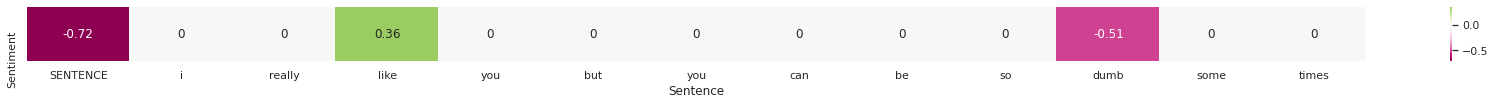

In [ ]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

In [ ]:

#emo_df = pd.DataFrame(0, index=tweets.index, columns=emotions)
